自分用に適当にコードを書いているため、説明が分かりにくいかもしれません。質問は
yutaka.higashis3@gmail.comもしくは、yutaka.higashis10@gmail.comまでお願い致します。

①ノートパソコンで作業しており、メモリ容量の関係から、データを使うときは毎回getdfsモジュールからデータをロードし、使用後はdel関数でメモリ消去をしています。高性能なPCで使う分にはdelしなくてもいいかもしれません。

## ライブラリ

In [172]:
import csv
import datetime as dt
import math
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
from matplotlib import animation
from matplotlib import pyplot as plt
from matplotlib import cm

from pylab import rcParams
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

#自作モジュール用フォルダにパスを通す
print(os.getcwd())
module_path = os.getcwd()[:-len('notebook')] + 'my_module'
print(module_path)
sys.path.append(module_path)

#自作モジュールと、モジュールアップデート用
#(importlib.reloadをしないとモジュールを書き換えても反映されないため)
import trendline
import dispgraphs
import importlib
import graph_settings
import getdfs
import calcdischarge
import ashida_michiue

importlib.reload(trendline)
importlib.reload(dispgraphs)
importlib.reload(graph_settings)
importlib.reload(getdfs)
importlib.reload(calcdischarge)
importlib.reload(ashida_michiue)


C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\notebook
C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\my_module


<module 'ashida_michiue' from 'C:\\Users\\user\\OneDrive - Kyoto University\\shared-Yutaka\\Research\\Hydrophone\\my_module\\ashida_michiue.py'>

## グラフセッティング

In [59]:
graph_settings.setsettings()

## 初期値設定

In [60]:
print(os.getcwd())
PATH_SAVE_GRAPHS = os.getcwd()[:-len('notebook')] + 'graphs_for_seminars/' + '11.14.seminar/'
print(PATH_SAVE_GRAPHS)

C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\notebook
C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\graphs_for_seminars/11.14.seminar/


In [61]:
USE_YEAR = '2017_2018'
# USE_YEAR = '2017'
# USE_YEAR = '2018'

In [62]:
# ハイドロフォン長さ
length_hp_m = 0.275
length_C_m = 0.5
pit_width = 0.2
Dv = 0.0125
Dh = 0.0125

W_IDEAL = np.array([0.15, 0.22, 0.29, 0.65, 0.91, 1.96, 3.01, 6.91, 10.81, 30])*0.001
TARGET_TOT = ['-2mm', '3-5mm', '5-6mm', '6-7mm', '7-8.5mm', '8.5-10mm', '10-12.5mm', '12.5-15mm', '15-20mm', '25-30mm', '30mm-']


event_marker = ['.', 'x', 'v', '1', 'D']

suffix = ['_Tot(1)', '_Tot(2)', '_Tot(3)', '_Tot(4)', '_Tot(5)',
            '_Tot(6)', '_Tot(7)', '_Tot(8)', '_Tot(9)', '_Tot(10)']

# 直上中央ハイドロフォン
names_of_center = ['hp'+ s for s in suffix]
# 中央ハイドロフォン
names_of_C = ['C'+ s for s in suffix]
# 中央右ハイドロフォン
names_of_RC = ['RC'+ s for s in suffix]
# 中央左ハイドロフォン
names_of_LC = ['LC'+ s for s in suffix]
# 右ハイドロフォン
names_of_R = ['R'+ s for s in suffix]
# 左ハイドロフォン
names_of_L = ['L'+ s for s in suffix]

# 右鉛直ハイドロフォン
names_of_VR = ['VR'+ s for s in suffix]
# 左鉛直ハイドロフォン
names_of_VL = ['VL'+ s for s in suffix]


# Corrected直上中央ハイドロフォン
names_of_center_Corrected = ['Corrected_hp'+ s for s in suffix]
# Corrected中央ハイドロフォン
names_of_C_Corrected = ['Corrected_C'+ s for s in suffix]
# Corrected中央右ハイドロフォン
names_of_RC_Corrected = ['Corrected_RC'+ s for s in suffix]
# Corrected中央左ハイドロフォン
names_of_LC_Corrected = ['Corrected_LC'+ s for s in suffix]
# Corrected右ハイドロフォン
names_of_R_Corrected = ['Corrected_R'+ s for s in suffix]
# Corrected左ハイドロフォン
names_of_L_Corrected = ['Corrected_L'+ s for s in suffix]



# スロットナンバーと倍率を対応させる
amplification_factor = {'Tot(1)': '1024', 'Tot(2)': '512', 'Tot(3)': '256', 'Tot(4)': '128',
                        'Tot(5)': '64', 'Tot(6)': '32', 'Tot(7)': '16', 'Tot(8)': '8',
                        'Tot(9)': '4', 'Tot(10)': '2'}

# データインポート

In [63]:
if USE_YEAR == '2017_2018':
    cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference', 'WaterLevel(cm)', 'Velocity(m/s)']

    print('COL_USE :' +  str(cols_use))

    df2017 = getdfs.get2017method2cleanedmean_pit_true()
    df2017 = df2017[cols_use]

    list_df2018_3events = getdfs.get2018_3events_method2_mean()
    for i, df2018_each in enumerate(list_df2018_3events):
        list_df2018_3events[i] = df2018_each[cols_use]

    df_all = pd.DataFrame()
    df_all = df_all.append(df2017)
    del df2017

    for i, df2018_each in enumerate(list_df2018_3events):
        df_all = df_all.append(df2018_each)

    del list_df2018_3events
    
elif USE_YEAR == '2017':
    cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference']

    print('COL_USE :' +  str(cols_use))

    df2017 = getdfs.get2017method2cleanedmean_pit_true()
    df2017 = df2017[cols_use]
    df_all = pd.DataFrame()
    df_all = df_all.append(df2017)
    del df2017
    
elif USE_YEAR == '2018':
    df_all = pd.DataFrame()
    for i, df2018_each in enumerate(list_df2018_3events):
        df_all = df_all.append(df2018_each)

    del list_df2018_3events


COL_USE :['hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Load_Avg', 'Load_Avg_difference', 'WaterLevel(cm)', 'Velocity(m/s)']
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


In [64]:
list_df2018_3events = getdfs.get2018_3events_method2_mean()
for i, df2018_each in enumerate(list_df2018_3events):
    list_df2018_3events[i] = df2018_each[cols_use]
    
df_2018 = pd.DataFrame()
for i, df2018_each in enumerate(list_df2018_3events):
        df_2018 = df_2018.append(df2018_each)

I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


In [173]:
list_of2017_8events = getdfs.get2017_8events_method2_mean()

I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


(-2, 30)

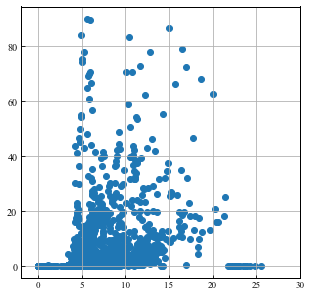

In [97]:
plt.figure(figsize=(5,5))
plt.scatter(quantity_of_flow, qcalc)
plt.xlim(-2,30)

季節ごと(月ごと)に分ける

In [98]:
def extract_by_month(df, month):
    return df[df.index.month == month]

def extract_by_year(df, year):
    return df[df.index.year == year]

list_monthly_qcalc = []
list_monthly_waterlevel = []
for i in range(12):
    list_monthly_qcalc.append(extract_by_month(qcalc, i+1))
    list_monthly_waterlevel.append(pd.DataFrame(extract_by_month(df_all, i+1)['WaterLevel(cm)']))

月ごとに見るとどうなるか？基本的に7月に流砂量が多い。イベントによって傾きはバラバラ。

<Figure size 360x360 with 0 Axes>

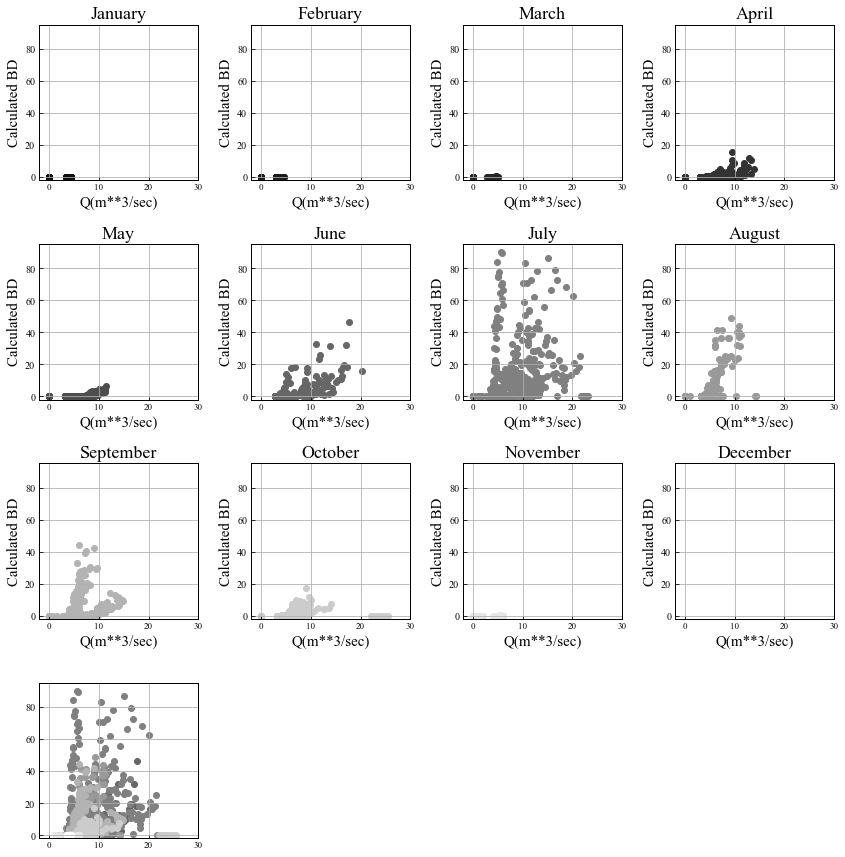

In [99]:
plt.figure(figsize=(5,5))
colorlist = ["0.05", "0.1", "0.15", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
months = ["January", "February", "March",  "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12, 12))
axis = []

for i in range(12):
    ax = plt.subplot(4,4,i+1)
    ax.scatter(list_monthly_waterlevel[i], list_monthly_qcalc[i], c=colorlist[i])
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

    ax.set_title(months[i])
    ax.set_ylabel('Calculated BD')
    ax.set_xlabel('Q(m**3/sec)')
    
    axis.append(ax)
    
    plt.tight_layout()


ax = plt.subplot(4,4,13)
for monthly_qcalc, monthly_waterlevel, color in zip(list_monthly_qcalc, list_monthly_waterlevel, colorlist):
    ax.scatter(monthly_waterlevel, monthly_qcalc, color=color)
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

axis.append(ax)



月ごとで見るとどうなるか。色が薄い→濃いで時系列を表現している。ひとまず2017年だけで見る(2018年も混ぜると1か月内の動きが見にくくなるから)
モジュールを作ったから()の中に見たいTotを入力すれば切り替えて見れる

In [100]:
qcalc_each.head()

,hp_Tot(5),hp_Tot(6),hp_Tot(7),hp_Tot(8),hp_Tot(9),hp_Tot(10)
TIMESTAMP,,,,,,
2016-06-03 00:00:00,0.000396,0.000000,0.0,0.0,0.0,0.0
2016-06-03 00:30:00,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-06-03 01:00:00,0.001187,0.001814,0.0,0.0,0.0,0.0
2016-06-03 01:30:00,0.000791,0.000000,0.0,0.0,0.0,0.0
2016-06-03 02:00:00,0.001187,0.000000,0.0,0.0,0.0,0.0


In [101]:
list_monthly_qcalc = []
list_monthly_waterlevel = []
for i in range(12):
    list_monthly_qcalc.append(extract_by_month(qcalc, i+1))
    list_monthly_waterlevel.append(pd.DataFrame(extract_by_month(df_all, i+1)['WaterLevel(cm)']))

<Figure size 360x360 with 0 Axes>

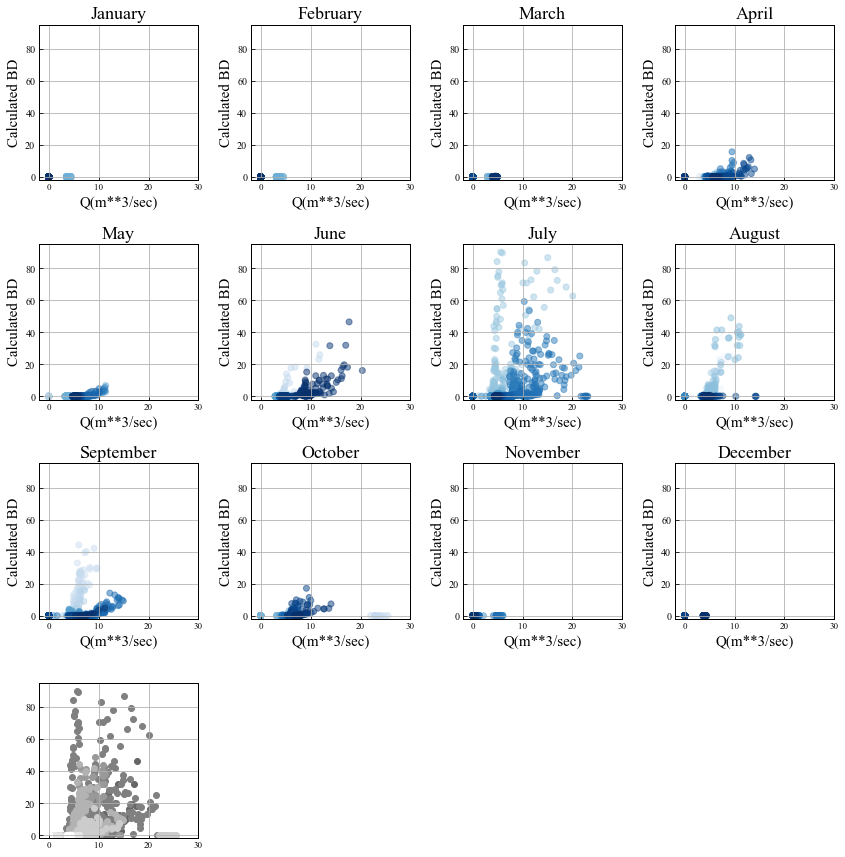

In [102]:
plt.figure(figsize=(5,5))
colorlist = ["0.05", "0.1", "0.15", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
months = ["January", "February", "March",  "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12, 12))
axis = []


for i in range(12):
    ax = plt.subplot(4,4,i+1)

    temp_num = np.array(list(range(len(list_monthly_waterlevel[i]))))
#     temp_num = np.random.rand(len(list_monthly_waterlevel[i]))
    ax.scatter(np.array(list_monthly_waterlevel[i]).flatten(), np.array(list_monthly_qcalc[i]).flatten(), c=temp_num, cmap='Blues', alpha=0.5)
    
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

    ax.set_title(months[i])
    ax.set_ylabel('Calculated BD')
    ax.set_xlabel('Q(m**3/sec)')
    
    axis.append(ax)
    
    plt.tight_layout()


ax = plt.subplot(4,4,13)
for monthly_qcalc, monthly_waterlevel, color in zip(list_monthly_qcalc, list_monthly_waterlevel, colorlist):
    ax.scatter(monthly_waterlevel, monthly_qcalc, color=color)
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

axis.append(ax)



では、粒径毎のふるまいはどうなるか？下のように今回はチャンネル５～１０を使用していて、それぞれが対象粒径を持っている(と仮定している)

In [103]:
qcalc_each.head()

,hp_Tot(5),hp_Tot(6),hp_Tot(7),hp_Tot(8),hp_Tot(9),hp_Tot(10)
TIMESTAMP,,,,,,
2016-06-03 00:00:00,0.000396,0.000000,0.0,0.0,0.0,0.0
2016-06-03 00:30:00,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-06-03 01:00:00,0.001187,0.001814,0.0,0.0,0.0,0.0
2016-06-03 01:30:00,0.000791,0.000000,0.0,0.0,0.0,0.0
2016-06-03 02:00:00,0.001187,0.000000,0.0,0.0,0.0,0.0


下のコードのhp_Tot()の中の数字を5~10に変化させると分かるが、tot(5)のときは、相関が比較的良いが、Tot(10)のときは相関が悪く分散している。つまり、粒径が小さい流砂に関しては、ある程度水理量に相関があるが、粒径が大きな流砂は水理量との相関が悪いことが分かる

<Figure size 360x360 with 0 Axes>

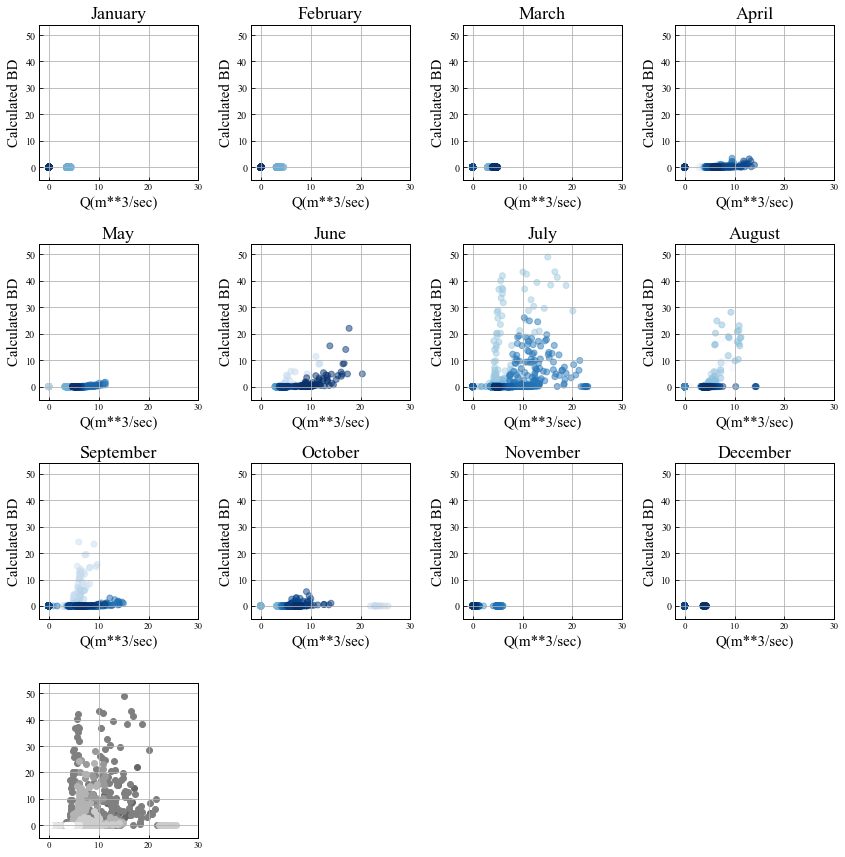

In [109]:
dispgraphs.disp_qcaleach_monthly(qcalc_each, df_all['WaterLevel(cm)'], tot_name='hp_Tot(5)')